In [1]:
#feature engineering
#creating user profiles
import numpy as np
sensor_data = {
    'lidar': np.random.rand(100),
    'camera': np.random.rand(100),
    'radar': np.random.rand(100)
}
features = {}
for sensor, data in sensor_data.items():
    features[f'{sensor}_mean'] = np.mean(data)
    features[f'{sensor}_std'] = np.std(data)
    features[f'{sensor}_max'] = np.max(data)
    features[f'{sensor}_min'] = np.min(data)

features['lidar_camera_corr'] = np.corrcoef(sensor_data['lidar'], sensor_data['camera'])[0, 1]
features['radar_camera_corr'] = np.corrcoef(sensor_data['radar'], sensor_data['camera'])[0, 1]
features['lidar_radar_corr'] = np.corrcoef(sensor_data['lidar'], sensor_data['radar'])[0, 1]

print(features)


{'lidar_mean': 0.5386727421385225, 'lidar_std': 0.2924226291719068, 'lidar_max': 0.9943416834558875, 'lidar_min': 0.006599144246275168, 'camera_mean': 0.5244283634348283, 'camera_std': 0.26832794816871425, 'camera_max': 0.9960252280767453, 'camera_min': 0.016454824426866854, 'radar_mean': 0.529043781918893, 'radar_std': 0.29681271112555024, 'radar_max': 0.9952452918222159, 'radar_min': 0.010877807857149757, 'lidar_camera_corr': -0.06573438956731162, 'radar_camera_corr': -0.027918955983407788, 'lidar_radar_corr': 0.14742159916241032}


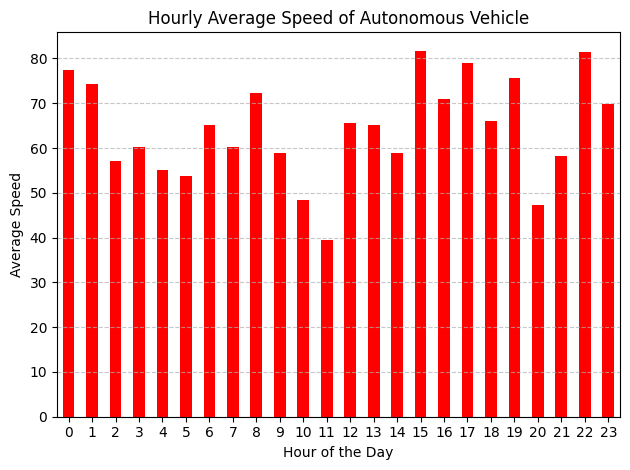

In [3]:
#temporal analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data: timestamps and speed of autonomous vehicle
timestamps = pd.date_range('2024-05-01', periods=100, freq='h')
speed_data = np.random.randint(30, 100, size=len(timestamps))

# Create DataFrame with timestamps and speed
df = pd.DataFrame({'timestamp': timestamps, 'speed': speed_data})

# Extract hour of the day and calculate average speed per hour
hourly_speed = df.groupby(df['timestamp'].dt.hour)['speed'].mean()

# Plot hourly average speed
hourly_speed.plot(kind='bar', color='red')  # Set plot color to red
plt.title('Hourly Average Speed of Autonomous Vehicle')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rvmut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 10, Loss: 2.9902
Epoch 20, Loss: 2.3182
Epoch 30, Loss: 2.2987
Epoch 40, Loss: 2.2879
Epoch 50, Loss: 2.2792
Epoch 60, Loss: 2.2713
Epoch 70, Loss: 2.2640
Epoch 80, Loss: 2.2569
Epoch 90, Loss: 2.2501
Epoch 100, Loss: 2.2434


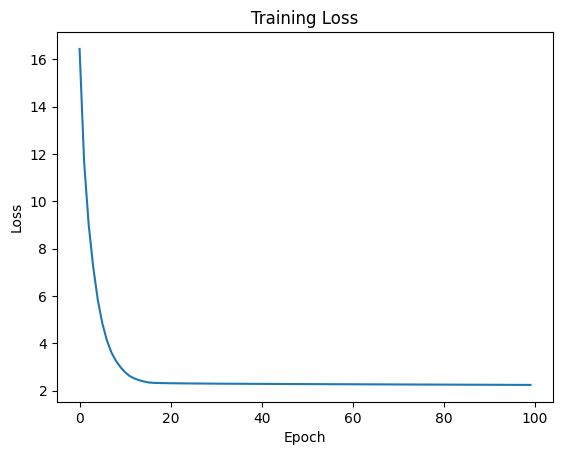

In [3]:
#content embeddings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')  # Download necessary tokenizer

# Example corpus (list of sentences)
corpus = [
    "Autonomous vehicles are the future of transportation",
    "Self-driving cars will revolutionize commuting",
    "Artificial intelligence powers autonomous vehicles",
    "Driverless cars use advanced sensors and algorithms",
    "The adoption of autonomous vehicles is increasing rapidly"
]

# Tokenize the corpus into words
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Create word vocabulary and index mapping
word_to_index = {word: idx for idx, word in enumerate(set(word for sentence in tokenized_corpus for word in sentence))}
index_to_word = {idx: word for word, idx in word_to_index.items()}
vocab_size = len(word_to_index)

# Generate training data
window_size = 2
data = []
for sentence in tokenized_corpus:
    for i, word in enumerate(sentence):
        for j in range(max(i - window_size, 0), min(i + window_size + 1, len(sentence))):
            if j != i:
                data.append((word_to_index[word], word_to_index[sentence[j]]))

# Convert training data to DataFrame
df = pd.DataFrame(data, columns=['input', 'output'])

# Initialize weight matrices for input and output layers
input_dim = vocab_size
hidden_dim = 100
output_dim = vocab_size
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Training parameters
learning_rate = 0.01
epochs = 100

# Training loop
losses = []
for epoch in range(epochs):
    epoch_loss = 0
    for _, row in df.iterrows():
        x = np.zeros(input_dim)
        x[row['input']] = 1
        y_true = np.zeros(output_dim)
        y_true[row['output']] = 1
        
        # Forward pass
        hidden_layer = np.dot(x, W1)
        output_layer = np.dot(hidden_layer, W2)
        
        # Softmax activation
        exp_scores = np.exp(output_layer)
        probs = exp_scores / np.sum(exp_scores)
        
        # Loss calculation (cross-entropy loss)
        loss = -np.log(probs[np.argmax(y_true)])
        epoch_loss += loss
        
        # Backpropagation
        delta_output = probs - y_true
        dW2 = np.outer(hidden_layer, delta_output)
        delta_hidden = np.dot(delta_output, W2.T)
        dW1 = np.outer(x, delta_hidden)
        
        # Update weights
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
    
    losses.append(epoch_loss / len(df))
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {epoch_loss / len(df):.4f}')

# Plot loss curve
plt.plot(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Word embeddings are the weights of the input layer
word_embeddings = W1


In [13]:
#printing the whole dataset
import pandas as pd
d=pd.read_csv("C:\\Users\\rvmut\\Desktop\\2018-19_AutonomousVehicleDisengagementReports(firsttimefilers).csv")
df=pd.DataFrame(d)
print(d)

        Manufacturer Permit Number        DATE         VIN NUMBER  \
0    Ambarella Corp.        AVT053   3/14/2018  3LN6L5MU7HR609845   
1    Ambarella Corp.        AVT053   3/14/2018  3LN6L5MU7HR609845   
2    Ambarella Corp.        AVT053   3/14/2018  3LN6L5MU7HR609845   
3    Ambarella Corp.        AVT053   3/14/2018  3LN6L5MU7HR609845   
4    Ambarella Corp.        AVT053   3/15/2018  3LN6L5MU7HR609845   
..               ...           ...         ...                ...   
449  ThorDrive, Inc.        AVT064   4/29/2019  1FTYE1CM8JKA52066   
450  ThorDrive, Inc.        AVT064  05-01-2019  1FTYE1CM8JKA52066   
451  ThorDrive, Inc.        AVT064  05-06-2019  1FTYE1CM8JKA52066   
452  ThorDrive, Inc.        AVT064  05-08-2019  1FTYE1CM8JKA52066   
453  ThorDrive, Inc.        AVT064   6/24/2019  1FTYE1CM8JKA52066   

    VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)  \
0                                                   No              
1                                

In [27]:
#importing numpy and pandas
import numpy as np
import pandas as pd


In [29]:
#printing some of the data from the datasets
print("Number of reports: " + str(df.shape[0]))
print("Number of unique manufacturers: " + str(df["Manufacturer"].nunique()))
print("Number of unique vehicles: " + str(df["VIN number"].nunique()))
print("Number of unique permits: " + str(df["Permit Number"].nunique()))

Number of reports: 454
Number of unique manufacturers: 8
Number of unique vehicles: 15
Number of unique permits: 8


In [32]:
df.head()
#to display first few data in the dataset

,Manufacturer,Permit Number,Date,VIN number,Vehicle Is Capable Of Operating Without A Driver,Driver Present,Disengagement Initiated By,Disengagement Location,Description Of Facts Causing Disengagement,N/A,N/A
0,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
1,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
3,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
4,Ambarella Corp.,AVT053,3/15/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN


In [34]:
#printing using index in the datasets
print("Number of reports: " + str(len(df.index)))
df.head()

Number of reports: 454


,Manufacturer,Permit Number,Date,VIN number,Vehicle Is Capable Of Operating Without A Driver,Driver Present,Disengagement Initiated By,Disengagement Location,Description Of Facts Causing Disengagement,N/A,N/A
0,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
1,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
3,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
4,Ambarella Corp.,AVT053,3/15/2018,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN


In [35]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#printing some of the data in the datasets using index value
#checking the data validation and data integrity
print("Number of reports: " + str(len(df.index)))
print("Number of unique vehicles: " +  str(df["VIN NUMBER"].nunique()))
print("Number of unique permtis: " +  str(df["PERMIT NUMBER"].nunique()))
print("Number of unique companies: " +  str(df["MANUFACTURER"].nunique()))
df.head()

Number of reports: 908
Number of unique vehicles: 15
Number of unique permtis: 8
Number of unique companies: 8


,MANUFACTURER,PERMIT NUMBER,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER,DRIVER PRESENT,DISENGAGEMENT INITIATED BY,DISENGAGEMENT LOCATION,FACTS CAUSING DISENGAGEMENT,,
0,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,Test Driver,Street,Unexpected result from the path planner in the...,NaN,NaN
1,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,Test Driver,Street,Unexpected result from the radar based percept...,NaN,NaN
2,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,Test Driver,Street,Unexpected result from the path planner in the...,NaN,NaN
3,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,no,yes,Test Driver,Street,Unexpected result from the GPS system in the g...,NaN,NaN
4,Ambarella Corp.,AVT053,3/15/2018,3LN6L5MU7HR609845,no,yes,Test Driver,Street,Unexpected result from the GPS system in the g...,NaN,NaN


<Axes: ylabel='count'>

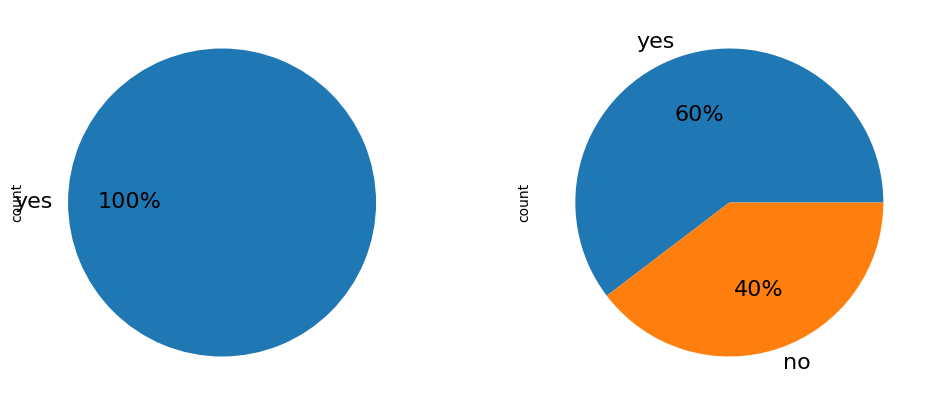

In [44]:
#visualizing data in the dataset as the pie chart
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
df['DRIVER PRESENT'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(1,2,2)
df['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

<Axes: xlabel='DISENGAGEMENT LOCATION'>

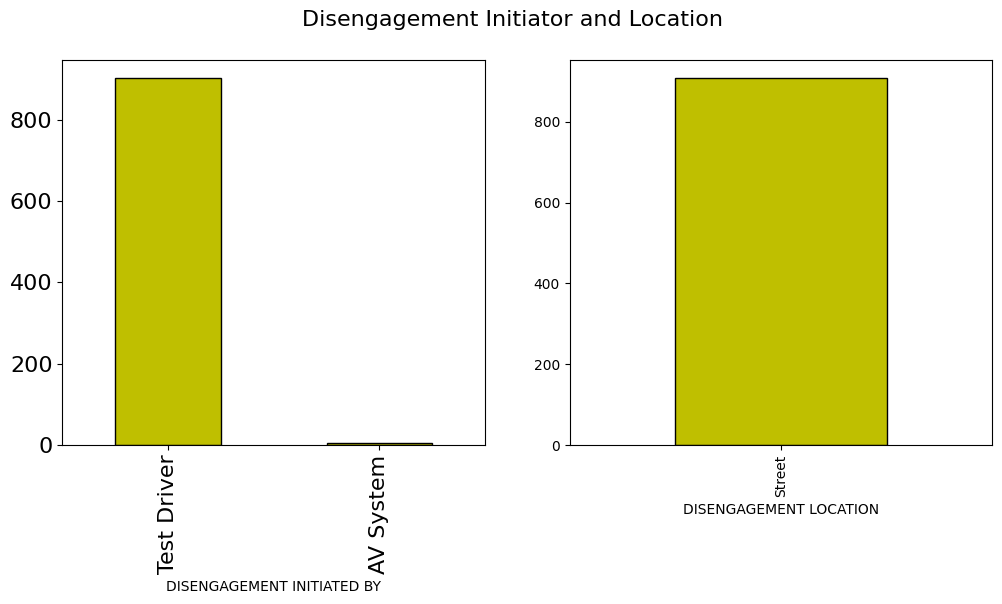

In [45]:
#visualizing data in the dataset as bar chart
plt.subplots(1,2,figsize=(12,5))
plt.suptitle('Disengagement Initiator and Location',fontsize=16)
plt.subplot(1,2,1)
df['DISENGAGEMENT INITIATED BY'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,2,2)
df['DISENGAGEMENT LOCATION'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)


In [55]:
#performing data validation using both groupby and unique function
dates = df.groupby('Date')["VIN number"].nunique()
print(dates)


Date
01-04-2019    1
01-10-2019    2
01-11-2019    1
01-12-2019    1
02-05-2019    1
             ..
8/13/2018     1
8/28/2018     1
8/30/2018     1
9/21/2018     1
9/27/2019     1
Name: VIN number, Length: 144, dtype: int64


In [57]:
d=df['Manufacturer']
print(d)
#printing the manufacturer column

0      Ambarella Corp.
1      Ambarella Corp.
2      Ambarella Corp.
3      Ambarella Corp.
4      Ambarella Corp.
            ...       
449    ThorDrive, Inc.
450    ThorDrive, Inc.
451    ThorDrive, Inc.
452    ThorDrive, Inc.
453    ThorDrive, Inc.
Name: Manufacturer, Length: 908, dtype: object


In [58]:
d=df['Permit Number']
print(d)
#printing the permit number column

0      AVT053
1      AVT053
2      AVT053
3      AVT053
4      AVT053
        ...  
449    AVT064
450    AVT064
451    AVT064
452    AVT064
453    AVT064
Name: Permit Number, Length: 908, dtype: object
